In [ ]:
# Mount google drive to have access to your data
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# ***Import librairies***

In [ ]:
!pip install scikit-plot

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.text import FreqDistVisualizer
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import scikitplot as skplt
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## ***Importing the dataset***

In [ ]:
data = pd.read_csv('/gdrive/My Drive/spam_or_not_spam.csv',encoding='latin-1')
print(data.head(10))

                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0
5   i just had to jump in here as carbonara is on...      0
6  the scotsman NUMBER august NUMBER playboy want...      0
7  martin adamson wrote isn t it just basically a...      0
8  the scotsman thu NUMBER aug NUMBER meaningful ...      0
9  i have been trying to research via sa mirrors ...      0


# ***1. DATA EXPLORATION***

## ***Goal:***
- Understand our data as best as possible
- Develop a first modeling strategy

##***Shape analysis:*** 
- **variable target** : Spam detection
- **rows & columns** : (3000, 2)
- **types of variable** : Categorical:1
- **Missing values**: 
    - 1 missing value
   
## ***Background analysis:***
-  **targets:** 
    - 0 -> No spam, quantity: 2500
    - 1-> spam, quantity: 500
    
- **Signification of variables**:
    -  Categorica variable:is variable that has one, two or more categories
    - Quantitative variable: binary(0, 1) 
 
    

   
    
 
    

## ***Data exploratory***

In [ ]:
data.shape

(3000, 2)

In [ ]:
data.dtypes

email    object
label     int64
dtype: object

In [ ]:
data.dtypes.value_counts()

int64     1
object    1
dtype: int64

In [ ]:
#verify missing value ( we have 1 missing value in column email)
data.isnull().sum()

email    1
label    0
dtype: int64

In [ ]:
# Fill  the missing value
data['email'].fillna(' ', inplace=True)

In [ ]:
# Recheck the missing value
data.isnull().sum()

email    0
label    0
dtype: int64

In [ ]:
data['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

In [ ]:
data.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


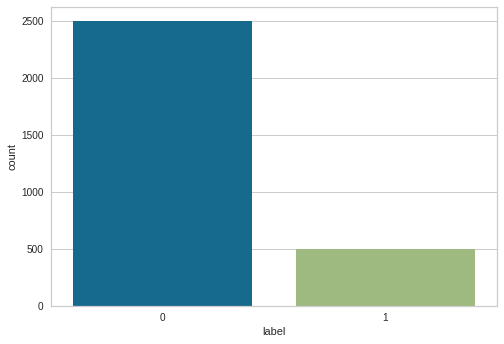

<Figure size 288x288 with 0 Axes>

In [ ]:
sns.countplot(data['label'],label="Count")
fig = plt.figure(figsize = (4, 4)) 
plt.show()

In [ ]:
# Create a visual representation of text data
from wordcloud import WordCloud

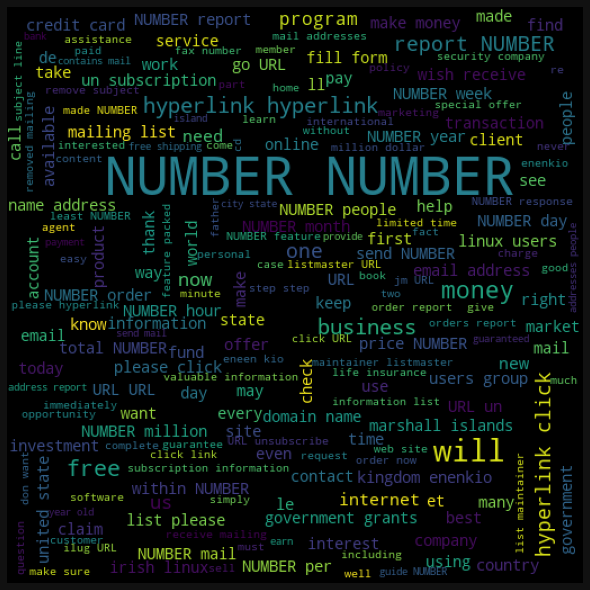

In [ ]:
spam_word = ''.join(list(data[data['label'] == 1]['email']))
spam_wc= WordCloud(width = 512, height = 512).generate(spam_word)
plt.figure(figsize= (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **Modeling**

In [ ]:
#Selection of variables
X =data['email']
y= data['label']

In [ ]:
#Splitting the dataset into train and test set
x_train,x_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print('X_train',x_train.shape)
print('X_test', x_test.shape)

X_train (2400,)
X_test (600,)


In [ ]:
#Instantiate countvectorizer and aplly stop_word
con_vec = CountVectorizer(stop_words=stopwords.words('english'))
x_train_count= con_vec.fit_transform(x_train)

In [ ]:
x_train_count.shape

(2400, 27225)

FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1eb18d3d68>,
                    color=None,
                    features=['__', '___', '____', '_____', '______', '_______',
                              '________', '_________', '__________',
                              '______________', '_______________',
                              '________________', '___________________',
                              '____________________', '_______________________',
                              '_________________________',
                              '_________...
                              '__________________________________________',
                              '_____________________________________________',
                              '______________________________________________',
                              '_______________________________________________',
                              '________________________________________________',
       

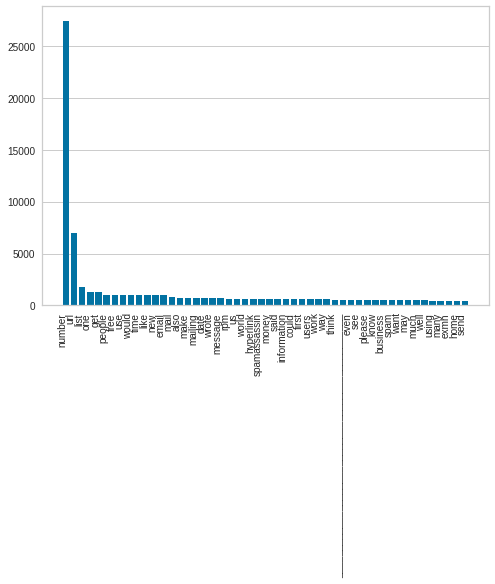

In [ ]:
#Token Frequency Distribution
feature =con_vec.get_feature_names()
visualizer =FreqDistVisualizer(features=feature,orient='v')
visualizer.fit(x_train_count)

In [ ]:
#Compute of word count with the function tfidtransformer
tfidftransformer = TfidfTransformer()
x_train_tfidf =tfidftransformer.fit_transform(x_train_count)

In [ ]:
#Transforming text into a meaningful representation of numbers with function TfidfVectorize
vectorizer = TfidfVectorizer()
X_train =vectorizer.fit_transform(x_train)

## ***Model selection***

### ***Decision tree***

In [ ]:
#DecisionTree model
classifier = DecisionTreeClassifier(criterion ='entropy')
classifier.fit(X_train, y_train)
#pipiline
text_clf = Pipeline([('tfidf',TfidfVectorizer()), ('clf',DecisionTreeClassifier())])
text_clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
               

In [ ]:
#prediction
y_pred= text_clf.predict(x_test)

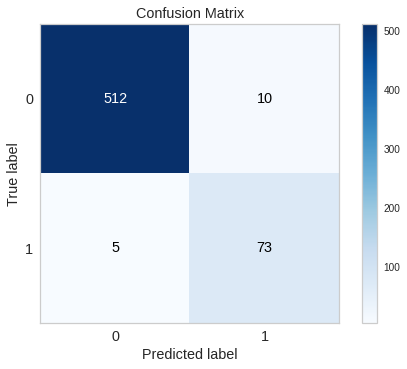

In [ ]:
#Confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix",text_fontsize='large')
plt.show()

In [ ]:
# Accurarcy score
acc= accuracy_score(y_test, y_pred)
print(acc)

0.975


In [ ]:
#Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       522
           1       0.87      0.94      0.90        78

    accuracy                           0.97       600
   macro avg       0.93      0.96      0.94       600
weighted avg       0.97      0.97      0.97       600



### ***SVM***



In [ ]:
# Define SVM model
classifier =SVC(C=1,gamma='auto',cache_size=200, kernel='poly')
classifier.fit(X_train,y_train)
print(classifier)
#pipiline
text_clf = Pipeline([('tfidf',TfidfVectorizer()), ('clf',SVC())])
text_clf.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [ ]:
#prediction
y_pred= text_clf.predict(x_test)

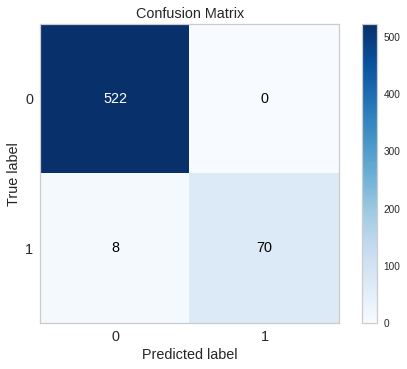

In [ ]:
#Confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, 
              title="Confusion Matrix",text_fontsize='large')
plt.show()

In [ ]:
# Accurarcy score
acc= accuracy_score(y_test, y_pred)
print(acc)

0.9866666666666667


In [ ]:
#Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       522
           1       1.00      0.90      0.95        78

    accuracy                           0.99       600
   macro avg       0.99      0.95      0.97       600
weighted avg       0.99      0.99      0.99       600

